In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [37]:

DATASET_PATH = "C:\\Users\\ASLAM\\\Desktop\\Bootcamp\\Day9\\PetImages\\Dog"  

image_filename = os.listdir(DATASET_PATH)[0] 
image_path = os.path.join(DATASET_PATH, image_filename)


image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (64, 64))

image_resized = image_resized / 255.0  

image_tensor = image_resized.reshape(1, 64, 64, 1)

In [38]:

filter_values = np.array([
    [[1, 0, 0], 
     [0, 1, 0], 
     [0, 0, 1]]
], dtype=np.float32)

conv_filter = filter_values.reshape(3, 3, 1, 1)



In [39]:

conv_filter_tensor = tf.constant(conv_filter, dtype=tf.float32)

feature_map = tf.nn.conv2d(image_tensor, conv_filter_tensor, strides=[1, 1, 1, 1], padding="VALID")

feature_map_np = feature_map.numpy().squeeze()


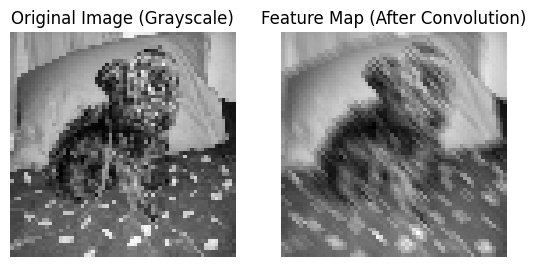

In [40]:
plt.subplot(1,2,1)
plt.imshow(image_resized, cmap="gray")
plt.title("Original Image (Grayscale)")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(feature_map_np, cmap="gray")
plt.title("Feature Map (After Convolution)")
plt.axis("off")
plt.show()
